### 实验4.6 常用异常检测模型的应用

#### 第1步 生成数据
+ 随机生成一组带有噪音点的数据
+ 使用Matplotlib将数据可视化

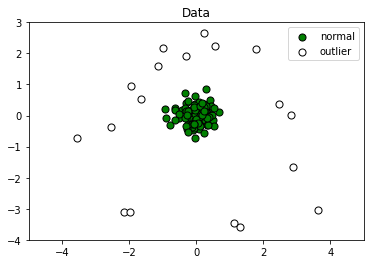

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rd = np.random.RandomState(99) # 设置随机状态
X_1 = 0.3 * rd.randn(100, 2) # 生成正常数据
X_2 = rd.uniform(-4, 4, size=(20, 2)) # 生成噪音数据

plt.title('Data') # 标题
plt.xlim(-5, 5) # x轴刻度
plt.ylim(-4, 3) # y轴刻度
plt.scatter(X_1[:, 0], X_1[:, 1], s=50, c='g', edgecolor='k', label='normal') # 画正常点
plt.scatter(X_2[:, 0], X_2[:, 1], s=50, c='w', edgecolor='k', label='outlier') # 画异常点
plt.legend()
plt.show()

#### 第2步 使用孤立森林（IsolationForest）进行异常检测
+ contamination - 异常值比例
+ n_estimators - 树的个数（默认100，树越多模型越稳定，但计算复杂度越高）

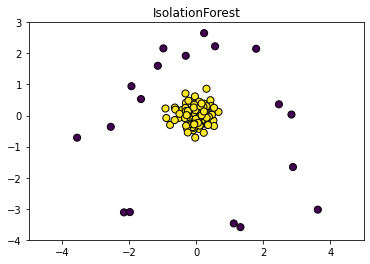

In [2]:
from sklearn.ensemble import IsolationForest

X = np.concatenate((X_1, X_2), axis=0) # 合并数据

# IsolationForest 
clf = IsolationForest(contamination=0.16) # 创建模型
y_pred = clf.fit_predict(X) # 拟合并预测

plt.title('IsolationForest') # 标题
plt.xlim(-5, 5) # x轴刻度
plt.ylim(-4, 3) # y轴刻度
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50,  edgecolor='k') # 可视化预测结果
plt.show()

#### 第3步 使用OneClassSVM进行异常检测
+ nu - 期望的异常值比例（默认0.5）
+ OneClassSVM的训练数据不包括噪音点

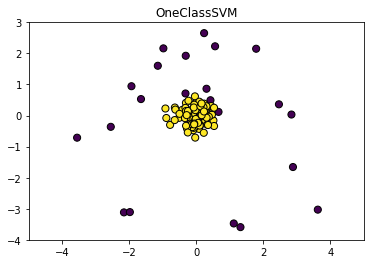

In [3]:
from sklearn.svm import OneClassSVM

# OneClassSVM
clf = OneClassSVM(nu=0.02).fit(X_1) # 拟合训练数据（注意：这里是X_1，不含噪音点）
y_pred = clf.predict(X) # 预测

plt.title('OneClassSVM')
plt.xlim(-5, 5) # x轴刻度
plt.ylim(-4, 3) # y轴刻度
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, edgecolor='k')
plt.show()

#### 第4步 使用LocalOutlierFactor进行异常检测
+ contamination - 异常值比例
+ n_neighbors - KNN邻居个数（默认20）

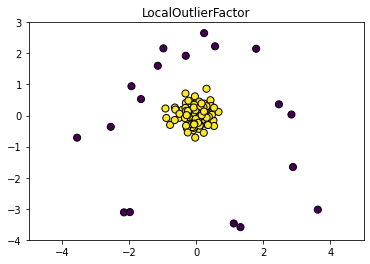

In [4]:
from sklearn.neighbors import LocalOutlierFactor

# LocalOutlierFactor
clf = LocalOutlierFactor(contamination=0.16) # 创建模型
y_pred = clf.fit_predict(X) # 拟合数据并预测

plt.title('LocalOutlierFactor') # 标题
plt.xlim(-5, 5) # x轴刻度
plt.ylim(-4, 3) # y轴刻度
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, edgecolor='k') # 预测结果可视化
plt.show()